# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [124]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import os
os.chdir('C:/Users/cts08/Tobigs19_work')


plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# Data Set Description(변수설명)

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > (반응변수)
* **Price** : The price of the used car in INR Lakhs.



< X > (설명변수) - unnamed 열 제외
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [125]:
# Load Data 
data = pd.read_csv("assignment2_data.csv")
dat = data.copy()
dat.head()

Unnamed: 0                              Name    Location  Year  \
0           0            Maruti Wagon R LXI CNG      Mumbai  2010   
1           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2           2                      Honda Jazz V     Chennai  2011   
3           3                 Maruti Ertiga VDI     Chennai  2012   
4           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0        NaN   1.75  
1  126.2 bhp    5.0        NaN  12.50  
2   88.7 bhp    5.0  8.61 Lakh   4.50  
3  88.76 bhp    7.0        NaN   6.00  
4  140.8 bhp    5.0        NaN  17.74

In [126]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [127]:
dat.describe()

Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000

먼저 데이터의 정보를 살펴보도록 한다.

반응변수(price, 수치형 변수)에 대해 13개의 설명변수를 가진 위 데이터 셋은

* 6019개의 데이터
* 수치형 변수(Unnamed, Year, Kilometers_Driven, Seats) - 4개
* 범주형 변수(Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, New_Price) - 9개

로 이루어져 있음을 확인할 수 있다.


하지만 여기서 각 변수들을 자세히 살펴보면 기존의 type과는 다른 변수들을 확인할 수 있다.

* Mileage(범주형 변수)
* Engine(범주형 변수)
* Power(범주형 변수)  
범주형 변수로 type이 설정된 세개의 변수들은 각각 수치적으로 표시되어 있지만 단위에 의해 object로 분류되어 있다.  
  

* Year(수치형 변수)
* Seats(수치형 변수)  
수치형 변수로 type이 설정된 두개의 변수에 대해서는 각각의 변수가 연속된 수의 개념이 아닌 특정 값들의 집합으로 볼 수 있지만(ex. seats는 0,1,2,3...과 같이 특정 좌석 수들로 이루어진 집합) int값으로 분류되어 있다.
  
따라서 이 변수들은 적절한 변환을 통해 각각을 수치형과 범주형으로 바꿔주어야 한다.

# Data Preprocessing(데이터 전처리)

## 1. 결측치 처리

In [128]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [129]:
dat.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

* Mileage, Engine, Power, Seats, New_Price 총 5가지 변수에 대해 결측치가 존재함을 확인할 수 있었다. 따라서 이후 회귀분석을 위해 해당 결측치를 제거해준다.  
* New_Price의 경우에는 824개의 값들을 제외한 나머지 5195개의 데이터에 대해 모두 NaN값이기 때문에 해당 열의 결측된 데이터가 너무 많으므로 모두 제거하기로 한다.
* (Unnamed: 0)의 변수는 특별한 의미가 없는 번호에 해당하는 변수이고 데이터마다 각각 다른 값들을 가진 변수이므로 제거해준다.

In [130]:
dat = dat.drop(["Unnamed: 0","New_Price"],axis=1).dropna()
dat

Name    Location  Year  Kilometers_Driven  \
0               Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1     Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                         Honda Jazz V     Chennai  2011              46000   
3                    Maruti Ertiga VDI     Chennai  2012              87000   
4      Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   
...                                ...         ...   ...                ...   
6014                  Maruti Swift VDI       Delhi  2014              27365   
6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015             100000   
6016             Mahindra Xylo D4 BSIV      Jaipur  2012              55000   
6017                Maruti Wagon R VXI     Kolkata  2013              46000   
6018             Chevrolet Beat Diesel   Hyderabad  2011              47000   

     Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0          CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1       Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2       Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3       Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4       Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   
...        ...          ...        ...         ...      ...        ...    ...   
6014    Diesel       Manual      First   28.4 kmpl  1248 CC     74 bhp    5.0   
6015    Diesel       Manual      First   24.4 kmpl  1120 CC     71 bhp    5.0   
6016    Diesel       Manual     Second   14.0 kmpl  2498 CC    112 bhp    8.0   
6017    Petrol       Manual      First   18.9 kmpl   998 CC   67.1 bhp    5.0   
6018    Diesel       Manual      First  25.44 kmpl   936 CC   57.6 bhp    5.0   

      Price  
0      1.75  
1     12.50  
2      4.50  
3      6.00  
4     17.74  
...     ...  
6014   4.75  
6015   4.00  
6016   2.90  
6017   2.65  
6018   2.50  

[5975 rows x 12 columns]

## 2. 변수 변환

첫번째 데이터셋을 가져와보도록 하자.

In [131]:
dat.head(1)

Name Location  Year  Kilometers_Driven Fuel_Type  \
0  Maruti Wagon R LXI CNG   Mumbai  2010              72000       CNG   

  Transmission Owner_Type     Mileage  Engine      Power  Seats  Price  
0       Manual      First  26.6 km/kg  998 CC  58.16 bhp    5.0   1.75

1. name : Maruti Wagon R LXI CNG = 차의 이름과 모델명, 버전, 연료 종류 순서로 이루어져 있다. 연료 종류는 Fuel_Type에 적혀있기 때문에 이름만 따로 분리해 재정의한다.
2. Mileage : 26.6 km/kg = 수치형 데이터이지만 object로 분류되어 있으므로 뒤의 단위를 제거하여 수치형으로 변환해준다.
3. Engine : 998 CC = 수치형 데이터이지만 object로 분류되어 있으므로 뒤의 단위를 제거하여 수치형으로 변환해준다.
4. Power : 58.16 bhp = 수치형 데이터이지만 object로 분류되어 있으므로 뒤의 단위를 제거하여 수치형으로 변환해준다.

### 2-1 Name

In [132]:
dat.Name.value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1855, dtype: int64

In [133]:
dat['Name']=dat['Name'].map(lambda x: str(x).strip().split(" ")[0])

### 2-2 Mileage

In [134]:
dat.Mileage.value_counts()

18.9 kmpl     172
17.0 kmpl     170
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
14.57 kmpl      1
14.33 kmpl      1
22.8 km/kg      1
8.0 kmpl        1
17.24 kmpl      1
Name: Mileage, Length: 442, dtype: int64

In [135]:
dat['Mileage']=dat['Mileage'].apply(lambda x: str(x).strip().split(" ")[0]).astype(float)

### 2-3 Engine

In [136]:
dat.Engine.value_counts()

1197 CC    606
1248 CC    512
1498 CC    303
998 CC     259
2179 CC    240
          ... 
1489 CC      1
1422 CC      1
1978 CC      1
2694 CC      1
1797 CC      1
Name: Engine, Length: 145, dtype: int64

In [137]:
dat['Engine']=dat['Engine'].apply(lambda x: str(x).strip().split(" ")[0]).astype(float)

### 2-4 Power

Power 변수의 경우에 데이터는 다른 데이터와 조금 다르게 나타났다.  
아래의 결과를 보면 'null bhp'로 위에서 결측치를 전부 제거했음에도 불구하고 값으로 입력되어 아래처럼 표기된 경우가 존재한다.

In [138]:
dat.loc[76]

Name                     Ford
Location               Jaipur
Year                     2008
Kilometers_Driven      111111
Fuel_Type              Diesel
Transmission           Manual
Owner_Type              First
Mileage                  17.8
Engine                 1399.0
Power                null bhp
Seats                     5.0
Price                     2.0
Name: 76, dtype: object

In [139]:
dat['Power']=dat['Power'].apply(lambda x: str(x).strip().split(" ")[0])

따라서 먼저 split을 통해 단위를 제거해준 뒤 to_numeric을 통해 null을 NaN 즉, 결측치로 변환시켜 준 후 해당 결측치를 평균으로 대체해준다.

In [140]:
dat['Power'] = pd.to_numeric(dat['Power'],errors='coerce').astype(float)
dat['Power'] = dat['Power'].fillna(dat['Power'].mean())

In [141]:
dat

Name    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0        Maruti      Mumbai  2010              72000       CNG       Manual   
1       Hyundai        Pune  2015              41000    Diesel       Manual   
2         Honda     Chennai  2011              46000    Petrol       Manual   
3        Maruti     Chennai  2012              87000    Diesel       Manual   
4          Audi  Coimbatore  2013              40670    Diesel    Automatic   
...         ...         ...   ...                ...       ...          ...   
6014     Maruti       Delhi  2014              27365    Diesel       Manual   
6015    Hyundai      Jaipur  2015             100000    Diesel       Manual   
6016   Mahindra      Jaipur  2012              55000    Diesel       Manual   
6017     Maruti     Kolkata  2013              46000    Petrol       Manual   
6018  Chevrolet   Hyderabad  2011              47000    Diesel       Manual   

     Owner_Type  Mileage  Engine   Power  Seats  Price  
0         First    26.60   998.0   58.16    5.0   1.75  
1         First    19.67  1582.0  126.20    5.0  12.50  
2         First    18.20  1199.0   88.70    5.0   4.50  
3         First    20.77  1248.0   88.76    7.0   6.00  
4        Second    15.20  1968.0  140.80    5.0  17.74  
...         ...      ...     ...     ...    ...    ...  
6014      First    28.40  1248.0   74.00    5.0   4.75  
6015      First    24.40  1120.0   71.00    5.0   4.00  
6016     Second    14.00  2498.0  112.00    8.0   2.90  
6017      First    18.90   998.0   67.10    5.0   2.65  
6018      First    25.44   936.0   57.60    5.0   2.50  

[5975 rows x 12 columns]

## 3. 범주형 변수 가공

일반적으로 범주형 변수들은 수치형 변수들처럼 연속적인 숫자들로 이루어지지 않기 때문에 회귀분석에서 그대로 사용하게 되면 오류를 범할 수 있다. 따라서 범주형 변수들을 one-hot-encoding을 통해 가공하여 수치형으로 변형해준다.

### 3-1 범주형 변수 설명

#### 3-1-1 Name

In [142]:
dat['Name'].value_counts()

Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Name, dtype: int64

Maruti부터 Lamborghini 까지 총 31개의 변수들로 구성된 범주형 변수이다.

#### 3-1-2 Location

In [143]:
dat['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

Mumbai부터 Ahmedabad까지 총 11개의 변수들로 구성된 범주형 변수이다.

#### 3-1-3 Fuel_Type

In [144]:
dat['Fuel_Type'].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

Diesel, Petrol, CNG 그리고 LPG 총 4개의 변수들로 구성된 범주형 변수이다.

#### 3-1-4 Transmission

In [145]:
dat['Transmission'].value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

Manual과 Automatic 2개의 변수로 구성된 범주형 변수이다.

#### 3-1-5 Owner_Type

In [146]:
dat['Owner_Type'].value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

First, Second, Third 그리고 Fourth & Above 총 4개의 변수로 구성된 범주형 변수이다.

#### 3-1-6 Year

In [147]:
dat['Year'] = dat['Year'].astype(str)
dat['Year'].value_counts()

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

1998년부터 2019년까지 총 22개의 변수로 구성된 범주형 변수이다.

#### 3-1-7 Seats

In [148]:
dat['Seats'] = dat['Seats'].astype(int).astype(str)
dat['Seats'].value_counts()

5     5012
7      674
8      134
4       99
6       31
2       16
10       5
9        3
0        1
Name: Seats, dtype: int64

0부터 10까지 1과 3을 제외한 총 9개의 변수로 구성된 범주형 변수이다.

### 3-2 더미변수화

In [149]:
data_cat = dat[['Name','Location','Fuel_Type','Transmission','Owner_Type','Year','Seats']]
data_dummies = pd.get_dummies(data_cat)

In [150]:
data_dummies

Name_Ambassador  Name_Audi  Name_BMW  Name_Bentley  Name_Chevrolet  \
0                   0          0         0             0               0   
1                   0          0         0             0               0   
2                   0          0         0             0               0   
3                   0          0         0             0               0   
4                   0          1         0             0               0   
...               ...        ...       ...           ...             ...   
6014                0          0         0             0               0   
6015                0          0         0             0               0   
6016                0          0         0             0               0   
6017                0          0         0             0               0   
6018                0          0         0             0               1   

      Name_Datsun  Name_Fiat  Name_Force  Name_Ford  Name_Honda  ...  \
0               0          0           0          0           0  ...   
1               0          0           0          0           0  ...   
2               0          0           0          0           1  ...   
3               0          0           0          0           0  ...   
4               0          0           0          0           0  ...   
...           ...        ...         ...        ...         ...  ...   
6014            0          0           0          0           0  ...   
6015            0          0           0          0           0  ...   
6016            0          0           0          0           0  ...   
6017            0          0           0          0           0  ...   
6018            0          0           0          0           0  ...   

      Year_2019  Seats_0  Seats_10  Seats_2  Seats_4  Seats_5  Seats_6  \
0             0        0         0        0        0        1        0   
1             0        0         0        0        0        1        0   
2             0        0         0        0        0        1        0   
3             0        0         0        0        0        0        0   
4             0        0         0        0        0        1        0   
...         ...      ...       ...      ...      ...      ...      ...   
6014          0        0         0        0        0        1        0   
6015          0        0         0        0        0        1        0   
6016          0        0         0        0        0        0        0   
6017          0        0         0        0        0        1        0   
6018          0        0         0        0        0        1        0   

      Seats_7  Seats_8  Seats_9  
0           0        0        0  
1           0        0        0  
2           0        0        0  
3           1        0        0  
4           0        0        0  
...       ...      ...      ...  
6014        0        0        0  
6015        0        0        0  
6016        0        1        0  
6017        0        0        0  
6018        0        0        0  

[5975 rows x 83 columns]

총 52개의 one-hot-encoding의 결과를 data_dummies에 저장시킨다.

## 4. 최종 데이터 셋

수치형 데이터인 data_num과 범주형 데이터인 data_dummies를 합하여 최종 데이터 data를 만들어준다.

In [151]:
data_num = dat[['Kilometers_Driven','Mileage','Engine','Power','Price']]
data = pd.concat([data_dummies,data_num],axis=1)

In [152]:
data

Name_Ambassador  Name_Audi  Name_BMW  Name_Bentley  Name_Chevrolet  \
0                   0          0         0             0               0   
1                   0          0         0             0               0   
2                   0          0         0             0               0   
3                   0          0         0             0               0   
4                   0          1         0             0               0   
...               ...        ...       ...           ...             ...   
6014                0          0         0             0               0   
6015                0          0         0             0               0   
6016                0          0         0             0               0   
6017                0          0         0             0               0   
6018                0          0         0             0               1   

      Name_Datsun  Name_Fiat  Name_Force  Name_Ford  Name_Honda  ...  Seats_5  \
0               0          0           0          0           0  ...        1   
1               0          0           0          0           0  ...        1   
2               0          0           0          0           1  ...        1   
3               0          0           0          0           0  ...        0   
4               0          0           0          0           0  ...        1   
...           ...        ...         ...        ...         ...  ...      ...   
6014            0          0           0          0           0  ...        1   
6015            0          0           0          0           0  ...        1   
6016            0          0           0          0           0  ...        0   
6017            0          0           0          0           0  ...        1   
6018            0          0           0          0           0  ...        1   

      Seats_6  Seats_7  Seats_8  Seats_9  Kilometers_Driven  Mileage  Engine  \
0           0        0        0        0              72000    26.60   998.0   
1           0        0        0        0              41000    19.67  1582.0   
2           0        0        0        0              46000    18.20  1199.0   
3           0        1        0        0              87000    20.77  1248.0   
4           0        0        0        0              40670    15.20  1968.0   
...       ...      ...      ...      ...                ...      ...     ...   
6014        0        0        0        0              27365    28.40  1248.0   
6015        0        0        0        0             100000    24.40  1120.0   
6016        0        0        1        0              55000    14.00  2498.0   
6017        0        0        0        0              46000    18.90   998.0   
6018        0        0        0        0              47000    25.44   936.0   

       Power  Price  
0      58.16   1.75  
1     126.20  12.50  
2      88.70   4.50  
3      88.76   6.00  
4     140.80  17.74  
...      ...    ...  
6014   74.00   4.75  
6015   71.00   4.00  
6016  112.00   2.90  
6017   67.10   2.65  
6018   57.60   2.50  

[5975 rows x 88 columns]

# Data Analysis(데이터 분석)

## 1. 데이터의 경향성 확인

데이터 전처리를 통해 나온 최종 데이터 셋과 수치형, 범주형 변수들에 대한 데이터셋을 다시한번 정의한 후 분석을 진행하고자 한다.

In [153]:
dat_num = data_num.copy() # 수치형 변수 데이터
dat_cat = data_cat.copy() # 범주형 변수 데이터
dat_dummies = data_dummies.copy() #더미변수화 시킨 범주형 변수 데이터
dat = data.copy()

### 1-1 수치형 설명변수의 산점도 및 상관관계 분석

<Figure size 1000x800 with 0 Axes>

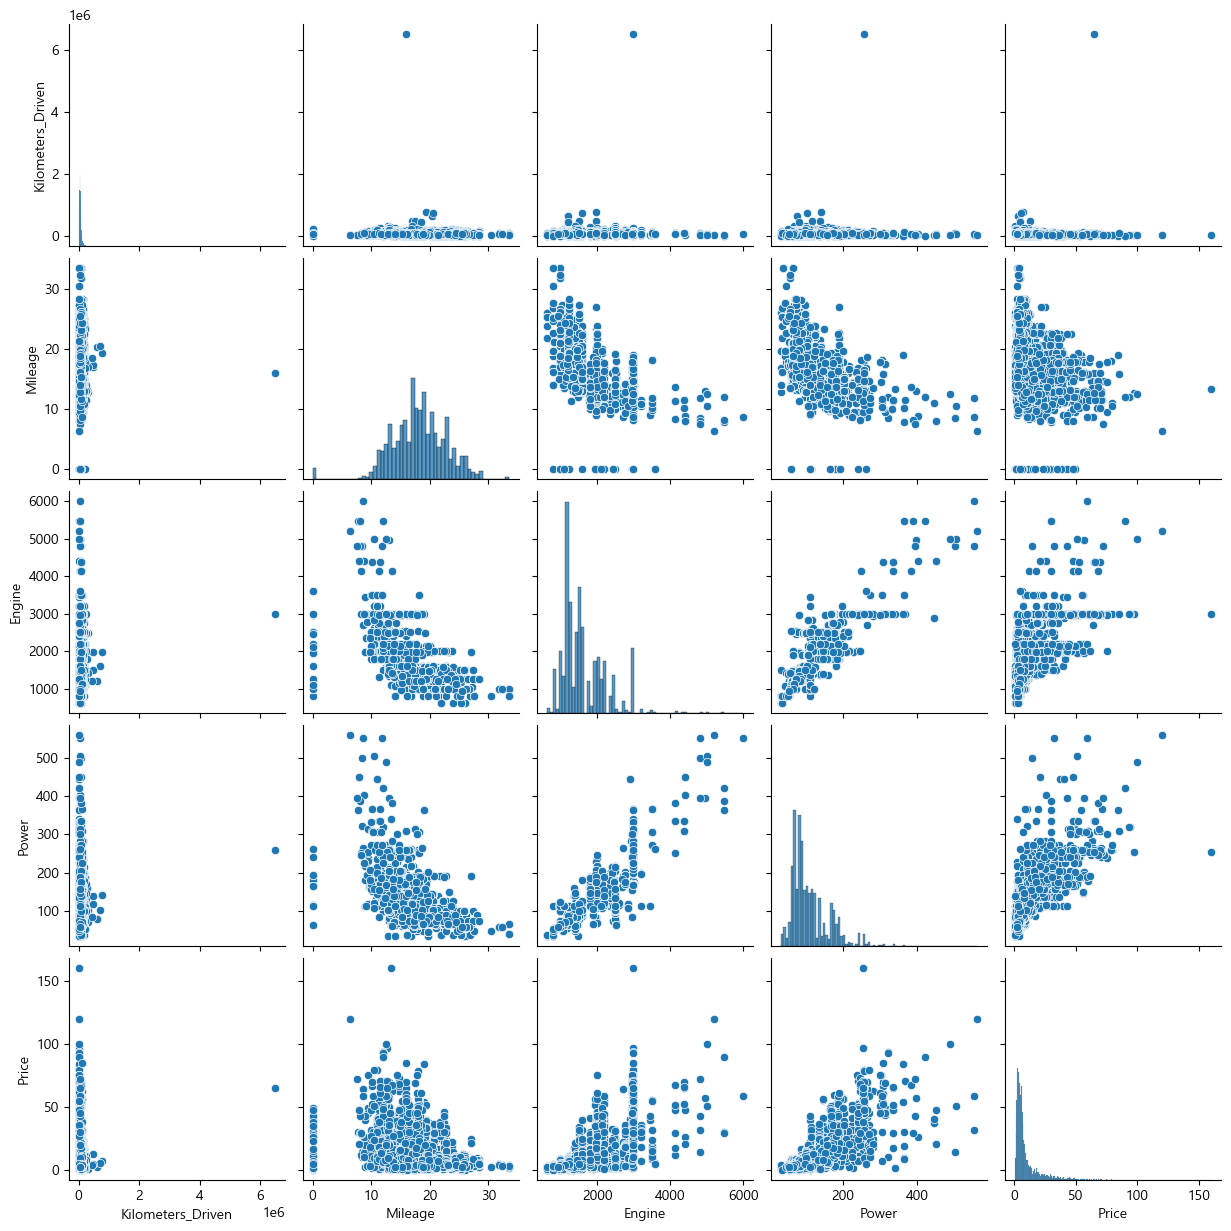

In [154]:
plt.figure(figsize=(10,8))
sns.pairplot(dat_num, diag_kind = 'hist')
plt.show()

해당 변수들의 산점도 행렬을 통해 중간중간 이상치들을 확인해볼 수 있다.  
적절한 이상치 제거를 할 필요가 있다고 판단된다.  

<AxesSubplot: >

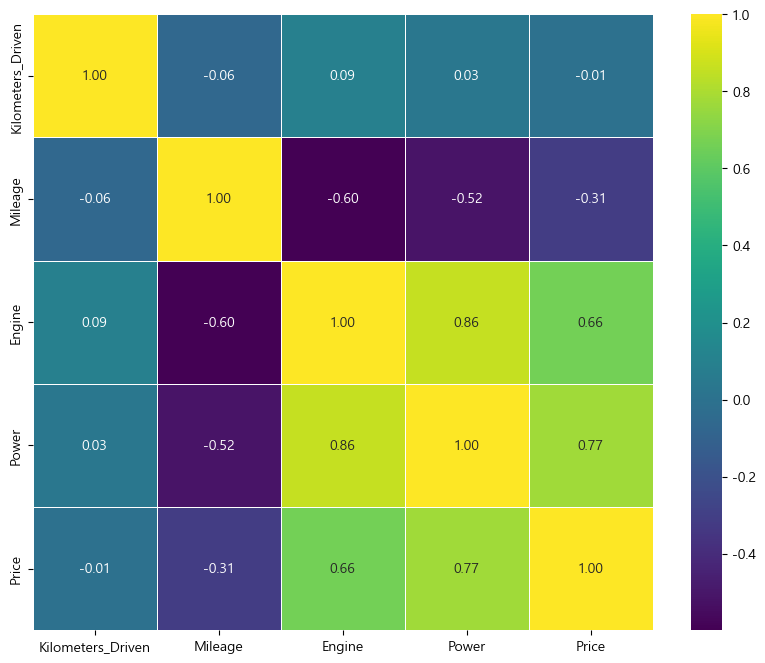

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(data = dat_num.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='viridis')

상관관계 heatmap을 통해 변수 간의 상관관계를 알아볼 수 있다.

* Engine과 Power는 0.86의 상관계수로 높은 양의 상관성을 가지고 있다.
* Power와 Engine은 모두 Price(반응변수)와 양의 상관성을 가지고 있다.
* Power와 Engine은 Mileage와 음의 상관성을 가지고 있다.

#### 1-1-a 이상치 탐색

Text(0.5, 0.98, '이산형 변수 히스토그램')

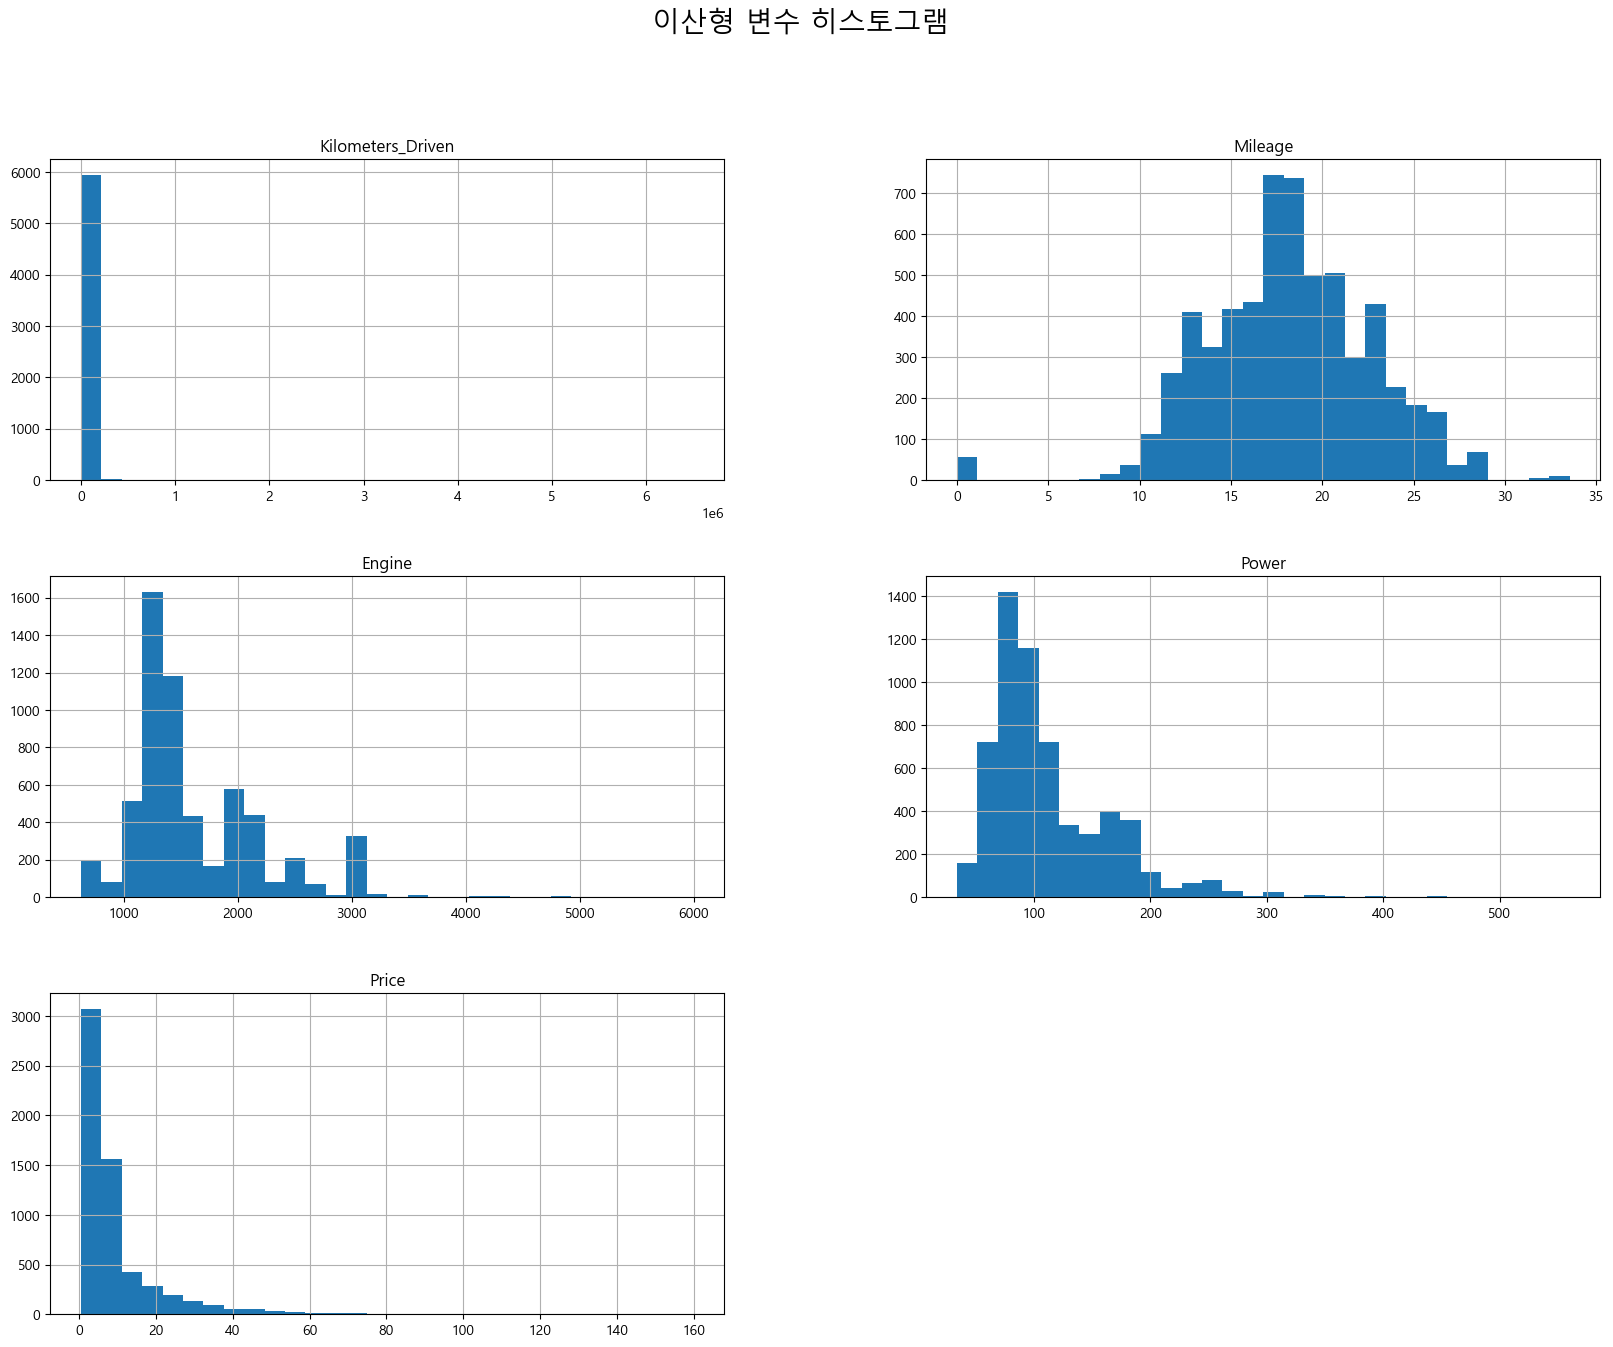

In [156]:
dat_num.hist(bins=30, figsize=(20,15))
plt.suptitle("이산형 변수 히스토그램", fontsize=20)

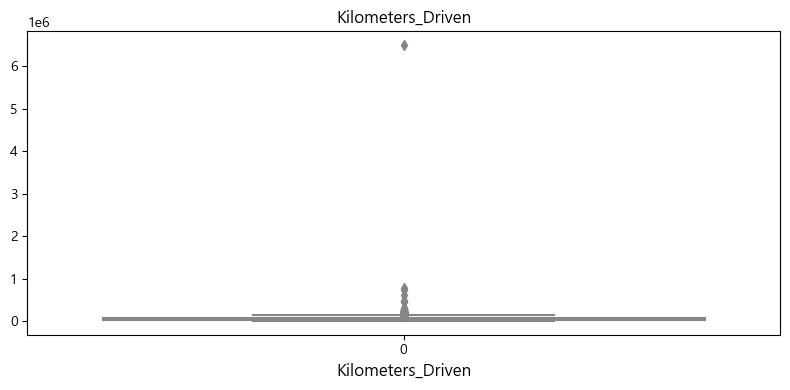

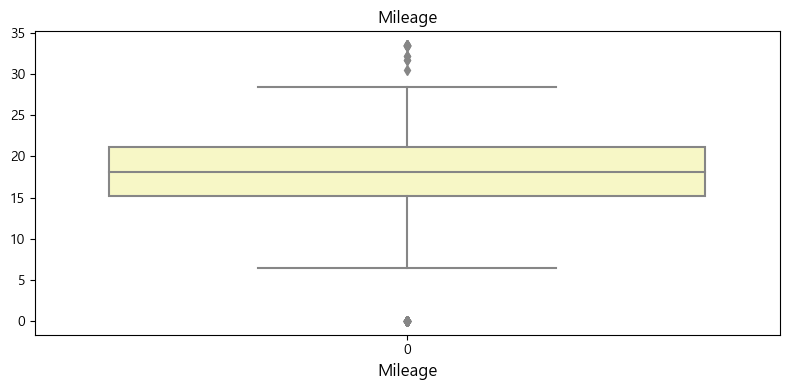

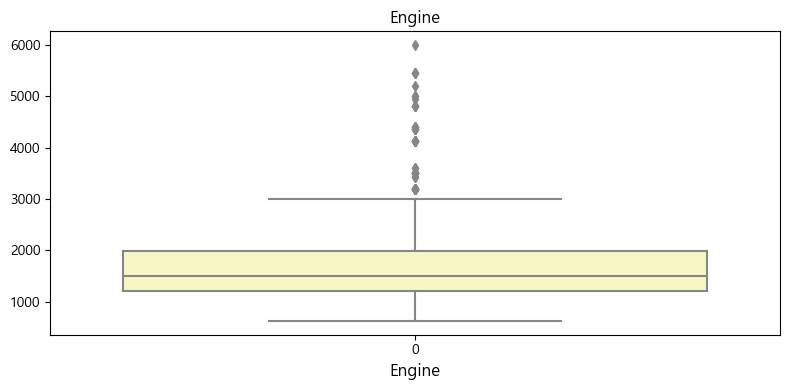

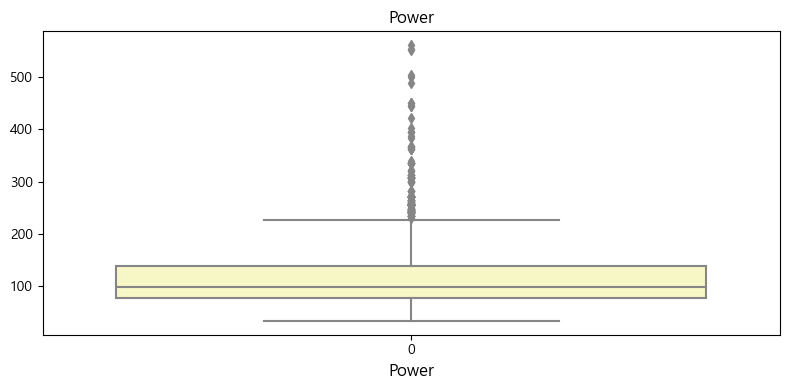

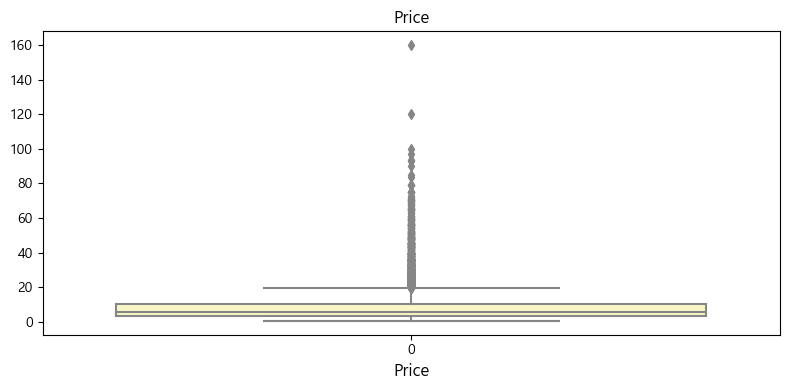

In [157]:
for i, col in enumerate(dat_num.columns):
    plt.figure(figsize=(8,4))
    sns.boxplot(dat_num[col], palette="Spectral")
    plt.title(col)
    plt.xlabel(col, size = 12)
    plt.tight_layout()

히스토그램을 보면 Kilometers_Driven의 첫번째 값이 압도적인 크기를 가지고 있음을 확인할 수 있다.  
또한 boxplot을 통해서도 다른 변수들에 비해 Kilometers_Driven의 이상치 점이 가장 차이가 많은 이상치 점이라고 판단된다.  
따라서 해당 데이터를 제거해준다.

In [158]:
dat['Kilometers_Driven'].sort_values()

1361        171
5606        600
2646       1000
2054       1000
173        1000
         ...   
3092     480000
358      620000
1860     720000
340      775000
2328    6500000
Name: Kilometers_Driven, Length: 5975, dtype: int64

해당 점은 2328번째 데이터의 값으로 Kilometers_Driven이 다른 값들에 비해 월등히 높은 6500000값이 나왔기 때문에 제거해준다.

In [159]:
dat = dat.drop(2328)

### 1-2 범주형 변수의 경향성 분석

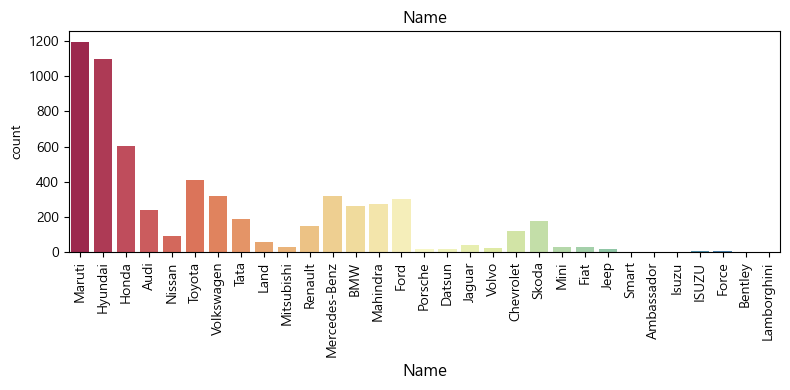

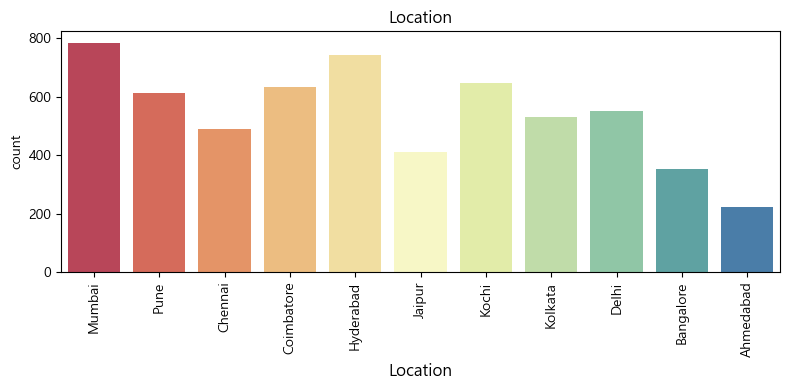

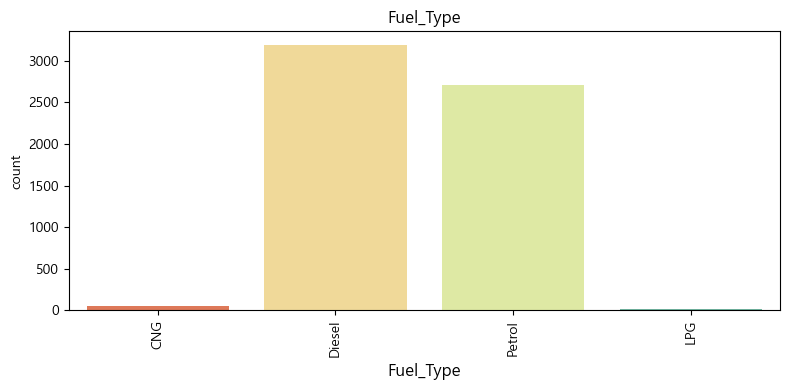

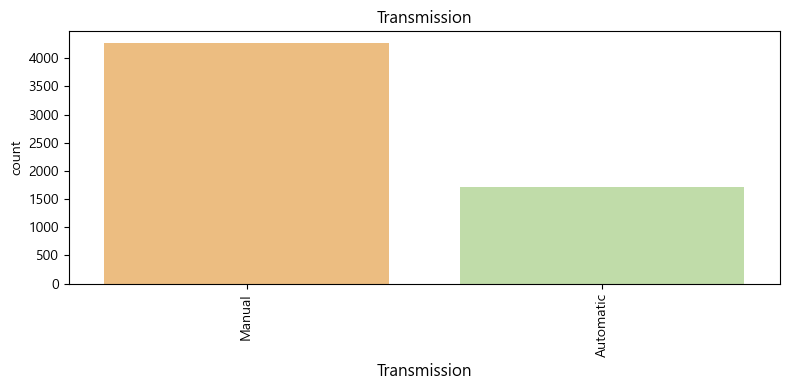

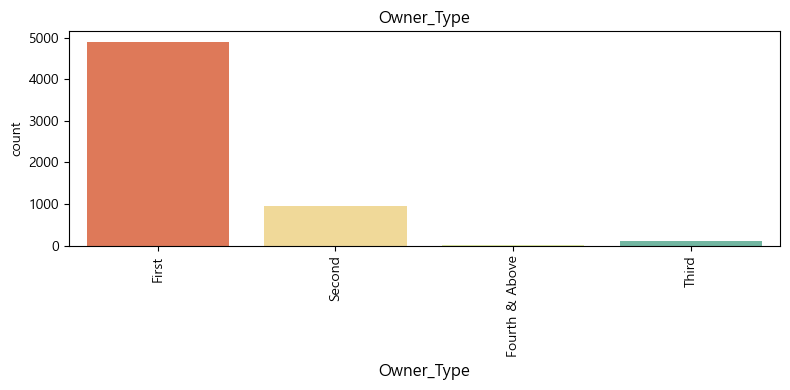

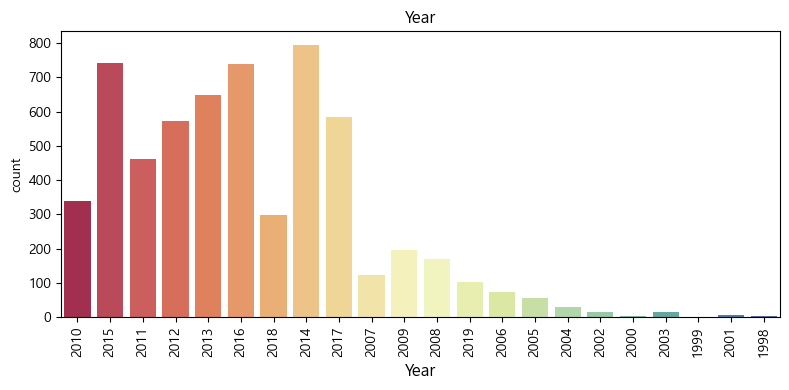

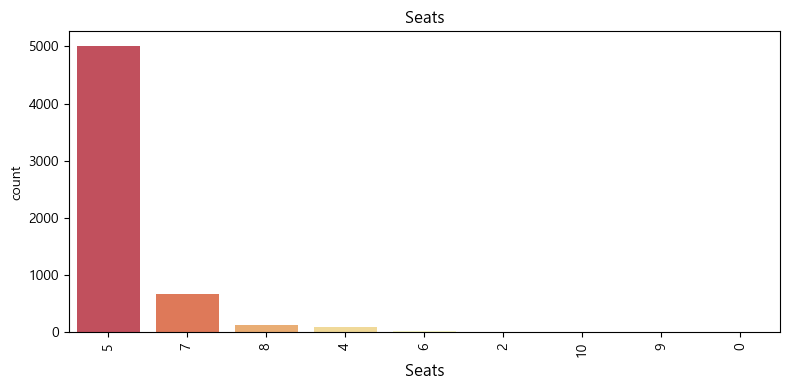

In [160]:
for i, col in enumerate(dat_cat.columns):
    plt.figure(figsize=(8,4))
    sns.countplot(x = col, data = dat_cat, palette="Spectral")
    plt.title(col)
    plt.xticks(rotation = 90)
    plt.xlabel(col, size = 12)
    plt.tight_layout()

범주형 변수의 경향을 파악해보자.

* Name : Maruti가 가장 많은 수를 가지고 있고 그 뒤를 Hyundai가 따르고 있다. 가장 작은 차종은 Lamborghini이다.
* Location : 차량을 구매할 수 있는 위치는 대부분 고르게 분포되어 있음을 확인할 수 있다.
* Fuel_Type : 연료의 종류는 대부분이 Diesel(디젤)과 Petrol(가솔린)이다.
* Transmission : 변속기는 manual(수동)이 Automatic(자동)보다 두배이상 많다.
* Owner_Type : 대부분이 first에 몰려 있고 second부터는 그 수가 매우 감소함을 볼 수 있다.
* Year : 대부분 2010년 이후의 값들에 많이 몰려있음을 볼 수 있다.
* Seats : 대부분이 5개 seat에 몰려있고 나머지는 거의 업음을 볼 수 있다.

## 2. 회귀분석 진행

### 2-1 선형 회귀분석

In [161]:
dat

Name_Ambassador  Name_Audi  Name_BMW  Name_Bentley  Name_Chevrolet  \
0                   0          0         0             0               0   
1                   0          0         0             0               0   
2                   0          0         0             0               0   
3                   0          0         0             0               0   
4                   0          1         0             0               0   
...               ...        ...       ...           ...             ...   
6014                0          0         0             0               0   
6015                0          0         0             0               0   
6016                0          0         0             0               0   
6017                0          0         0             0               0   
6018                0          0         0             0               1   

      Name_Datsun  Name_Fiat  Name_Force  Name_Ford  Name_Honda  ...  Seats_5  \
0               0          0           0          0           0  ...        1   
1               0          0           0          0           0  ...        1   
2               0          0           0          0           1  ...        1   
3               0          0           0          0           0  ...        0   
4               0          0           0          0           0  ...        1   
...           ...        ...         ...        ...         ...  ...      ...   
6014            0          0           0          0           0  ...        1   
6015            0          0           0          0           0  ...        1   
6016            0          0           0          0           0  ...        0   
6017            0          0           0          0           0  ...        1   
6018            0          0           0          0           0  ...        1   

      Seats_6  Seats_7  Seats_8  Seats_9  Kilometers_Driven  Mileage  Engine  \
0           0        0        0        0              72000    26.60   998.0   
1           0        0        0        0              41000    19.67  1582.0   
2           0        0        0        0              46000    18.20  1199.0   
3           0        1        0        0              87000    20.77  1248.0   
4           0        0        0        0              40670    15.20  1968.0   
...       ...      ...      ...      ...                ...      ...     ...   
6014        0        0        0        0              27365    28.40  1248.0   
6015        0        0        0        0             100000    24.40  1120.0   
6016        0        0        1        0              55000    14.00  2498.0   
6017        0        0        0        0              46000    18.90   998.0   
6018        0        0        0        0              47000    25.44   936.0   

       Power  Price  
0      58.16   1.75  
1     126.20  12.50  
2      88.70   4.50  
3      88.76   6.00  
4     140.80  17.74  
...      ...    ...  
6014   74.00   4.75  
6015   71.00   4.00  
6016  112.00   2.90  
6017   67.10   2.65  
6018   57.60   2.50  

[5974 rows x 88 columns]

여기서 각 변수들의 단위들이 모두 다르기 때문에 scale과정이 필요하다.  
따라서 MinMaxScaler를 통해 적절히 스케일링을 해준 뒤 회귀분석을 진행한다.

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [163]:
X = dat.drop(columns = ['Price'], axis=1).to_numpy()
y = dat['Price'].to_numpy()

In [164]:
X.shape, y.shape  # n = 5975, p = 87 인 X행렬, 5975개의 값들을 가진 y벡터

((5974, 87), (5974,))

In [165]:
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scale, y)

print("model accuarcay : {}".format(model.score(X_scale, y)))

model accuarcay : 0.7990563544384355


최종 데이터를 바탕으로 sklearn을 통해 회귀분석을 진행해본 결과 약 0.8(0.799)의 정확도를 보여주었다.

In [166]:
print(model.intercept_)   # intercept
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

7868655592116.17
[-2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11
 -2.64736381e+11 -2.64736381e+11 -2.64736381e+11  1.74183972e+12
  1.74183972e+12  1.74183972e+12  1.74183972e+12  1.74183972e+12
  1.74183972e+12  1.74183972e+12  1.74183972e+12  1.74183972e+12
  1.74183972e+12  1.74183972e+12 -8.72253381e+12 -8.72253381e+12
 -8.72253381e+12 -8.72253381e+12  1.18358623e+12  1.18358623e+12
 -3.96024333e+12 -3.96024333e+12 -3.96024333e+12 -3.96024333e+12
  1.29375542e+12  1.29375542e+12  1.29375542e+12  1.29375542e+12
  1.29375542e+12  1.29375542e+12  1.29375542e+12  1.29375542e+12
  1.2937

그리고 이때 위와 같은 모델의 편향(intercept)값과 가중치 벡터(coef)를 확인할 수 있다.

### 2-2 회귀진단

경향성 파악과 모델의 회귀분석 결과를 살펴본 뒤 적합성을 확인해보도록 한다.  
적합성 확인은 statsmodels의 ols를 이용하여 그 결과를 알아볼 수 있다.

In [167]:
import statsmodels.api as sm

In [168]:
dat_list = list(dat.columns.values)
dat_list.pop()

'Price'

In [175]:
ols_model = sm.OLS(dat["Price"].values, dat[dat_list].values)
result = ols_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     292.9
Date:                Fri, 27 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:11:49   Log-Likelihood:                -18107.
No. Observations:                5974   AIC:                         3.638e+04
Df Residuals:                    5893   BIC:                         3.692e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.9214      5.099     -0.181      0.8

위의 표로 알아볼 수 있는 모델의 적합 결과를 확인해보자.

* **R-squared, Adj R-squared** : 모델의 설명력을 의미하며 앞서 sklearn에서 구한 회귀분석 정확도와 같은 값이 나온다. 따라서 모델의 설명력은 약 0.8(조정된 결정계수 값 역시 0.796로 약 0.8)로 어느정도 잘 설명한다고 말할 수 있다.
* **F-statistic** : F통계량 값은 모델의 유의성 검정을 의미하여 설정한 모형이 적절한가를 알아보는 지표이다. 통계량 값은 292.9이며 유의확률이 0.001보다 작으므로 귀무가설을 기각하여 모형이 적절하다고 말할 수 있다.
* **AIC, BIC** : 해당 값들은 모델 평가 성능을 나타내는 수치이며 수치가 낮을수록 좋지만 모두 약 36000정도로 높은 수치를 보이므로 좋지않다고 할 수 있다.
* **coef, std err** : 모델의 변수들에 대한 회귀계수와 표준오차를 의미한다.
* **t-value** : t검정의 결과값으로 t-test 즉, 각각의 회귀계수 유의성 검정 결과를 보여준다. 유의수준이 0.05일 때 개별 회귀계수의 t 검정을 통해 얻은 p-value 값이 0.05보다 작은 경우 해당 변수가 유의하다고 판단할 수 있다.  
모든 변수들에 대해 살펴보면 중간에 유의하지 않은 변수들이 있음을 확인할 수 있다.
* **Durbin-Watson** : DW 검정은 오차의 독립성 검정을 위한 값으로 0과 4를 기준으로 2에 가까울수록 자기상관이 없고 독립성을 만족한다고 할 수 있는데 2.031은 2에 매우 근접하므로 독립성을 만족한다고 볼 수 있다.
* **Cond, No** : 다중공선성 검정으로 10 이상일 경우 다중공선성이 있다고 판단한다. 위의 결과에서는 약 1e+16으로 매우 높은 다중공선성을 보인다고 볼 수 있다.

## 3. 다른 회귀분석 진행

추가로 Ridge, Lasso, 다항 회귀에 대해서도 진행해보도록 한다.

In [192]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

### 3-1 릿지 회귀

In [193]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha = alpha)

gs = GridSearchCV(estimator=Ridge(), param_grid = param_grid, cv=10)
result = gs.fit(X_scale, y)

print("best score : {}".format(result.best_score_))
print("best parameter : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수 : 0.7834432524799512
최적 파라미터 : {'alpha': 0.001}
Ridge(alpha=0.001)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.007785      0.002244         0.000493        0.000536       0.001   
1       0.006483      0.000809         0.000693        0.000454        0.01   
2       0.006332      0.000908         0.000544        0.000467         0.1   
3       0.007523      0.002312         0.000100        0.000299           1   
4       0.007281      0.002195         0.000312        0.000468          10   
5       0.006931      0.001485         0.000283        0.000365         100   
6       0.007472      0.000770         0.000546        0.000312        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.803015           0.798985           0.795200   
1   {'alpha': 0.01}           0.803025           0.798980           0.795187   
2    {'alpha': 0.1}           0.803143           0.798925           0.795060   
3      {'alpha': 1}           0.805251           0.798598           0.793792   
4     {'alpha': 10}           0.814173           0.790621           0.779299   
5    {'alpha': 100}           0.732797           0.686575           0.676797   
6   {'alpha': 1000}           0.518198           0.496006           0.497688   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.758497           0.806545           0.790733           0.684353   
1           0.758514           0.806539           0.790758           0.684366   
2           0.758662           0.806469           0.791003           0.684445   
3           0.758997           0.805426           0.793333           0.683501   
4           0.748230           0.789701           0.800050           0.664859   
5           0.647798           0.682022           0.720427           0.560474   
6           0.458633           0.498649           0.540462           0.412798   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.758880           0.834015           0.804208         0.783443   
1           0.758888           0.834013           0.804155         0.783442   
2           0.758984           0.833988           0.803640         0.783432   
3           0.760550           0.833773           0.799011         0.783223   
4           0.767559           0.826184           0.761009         0.774169   
5           0.701245           0.728293           0.605732         0.674216   
6           0.517047           0.531430           0.421609         0.489252   

   std_test_score  rank_test_score  
0        0.039221                1  
1        0.039213                2  
2        0.039148                3  
3        0.039088                4  
4        0.042840                5  
5        0.052695                6  
6        0.041923                7

gridsearch를 통해 릿지 회귀에서의 최적일 때의 정확도와 파라미터 값을 살펴보면 0.7834, alpha = 0.001이 나옴을 확인할 수 있다.

### 3-2 라쏘 회귀

In [194]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha = alpha)

gs = GridSearchCV(estimator=Lasso(), param_grid = param_grid, cv=10)
result = gs.fit(X_scale, y)

print("best score : {}".format(result.best_score_))
print("best parameter : {}".format(result.best_params_))
print(gs.best_estimator_)
pd.DataFrame(result.cv_results_)

최적 점수 : 0.7837189833333771
최적 파라미터 : {'alpha': 0.001}
Lasso(alpha=0.001)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.160657      0.037871         0.000574        0.000474       0.001   
1       0.041700      0.009509         0.000653        0.000453        0.01   
2       0.021464      0.002295         0.000499        0.000499         0.1   
3       0.011361      0.003683         0.000330        0.000424           1   
4       0.009910      0.001577         0.000339        0.000457          10   
5       0.008611      0.002096         0.000687        0.000492         100   
6       0.009884      0.002990         0.000535        0.000545        1000   

             params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.001}           0.803064           0.802595           0.795361   
1   {'alpha': 0.01}           0.800462           0.799740           0.791119   
2    {'alpha': 0.1}           0.729802           0.703878           0.693334   
3      {'alpha': 1}           0.351868           0.337599           0.344271   
4     {'alpha': 10}          -0.008438          -0.000539          -0.001142   
5    {'alpha': 100}          -0.008438          -0.000539          -0.001142   
6   {'alpha': 1000}          -0.008438          -0.000539          -0.001142   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.758045           0.807014           0.791448           0.685285   
1           0.755573           0.801040           0.791255           0.681102   
2           0.672143           0.713348           0.726624           0.596531   
3           0.316397           0.357204           0.372939           0.284570   
4          -0.001470          -0.000020          -0.004293          -0.006746   
5          -0.001470          -0.000020          -0.004293          -0.006746   
6          -0.001470          -0.000020          -0.004293          -0.006746   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.758237       8.368149e-01           0.799327         0.783719   
1           0.751929       8.366447e-01           0.793517         0.780238   
2           0.694544       7.629087e-01           0.704960         0.699807   
3           0.343482       3.710611e-01           0.301141         0.338053   
4          -0.000286      -1.335808e-07          -0.000005        -0.002294   
5          -0.000286      -1.335808e-07          -0.000005        -0.002294   
6          -0.000286      -1.335808e-07          -0.000005        -0.002294   

   std_test_score  rank_test_score  
0        0.039407                1  
1        0.040072                2  
2        0.041627                3  
3        0.027613                4  
4        0.002939                5  
5        0.002939                5  
6        0.002939                5

마찬가지로 라쏘 회귀에서의 최적일 때의 정확도와 파라미터 값을 살펴보면 0.7837, alpha = 0.001이 나옴을 확인할 수 있다.

### 3-4 다항 회귀

In [197]:
from sklearn.preprocessing import PolynomialFeatures

In [198]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
                 
model.fit(X_scale,y)
print("model accuracy: {}".format(model.score(X_scale, y)))

model accuracy: 0.9589004469582664


마지막으로 차수가 2인 다항회귀를 진행하였을 때 그 정확도가 0.95로 아주 높은 정확도를 보이고 있음을 알 수 있다.